In [1]:
from pipeline.pipeline import Pipe

In [2]:
parent_dir = 'D:/Yuval/'
mff_filename = 'nap_data/HZ4/HZ4_SLEEP_20210629_132715.mff'
hypno_filename = 'scored_nap_data/HZ4-SharonsScore-oldFormat.txt'
subject_code = 'HZ4'

In [3]:
pipe = Pipe(subject_code, parent_dir+mff_filename, parent_dir+'plots', parent_dir+hypno_filename)

Reading EGI MFF Header from D:\Yuval\nap_data\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


22-Nov-22 18:58:38 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


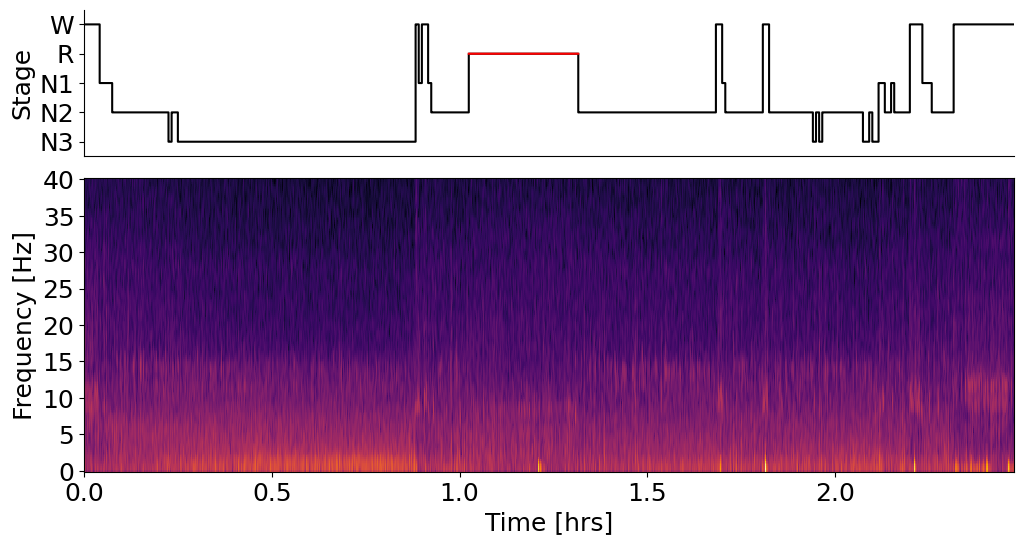

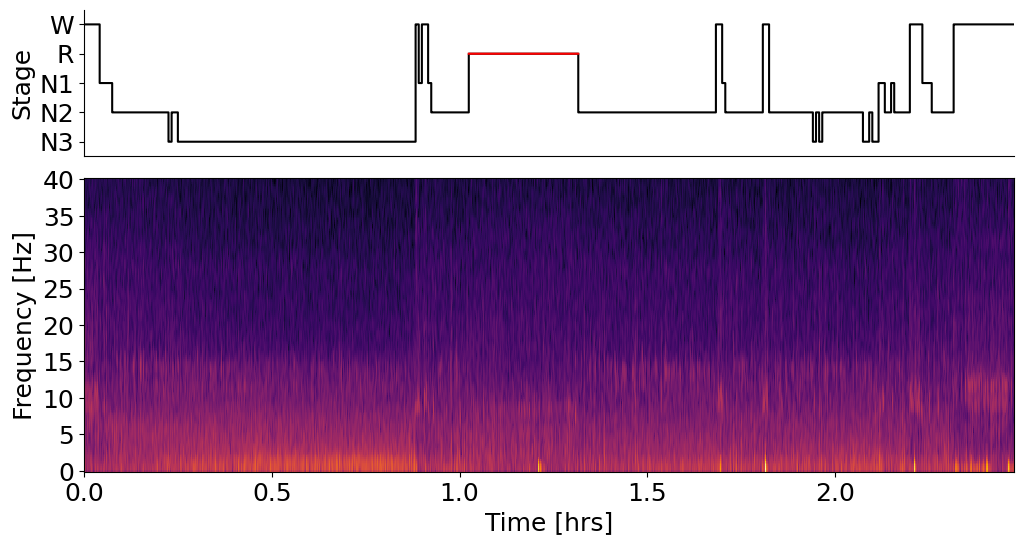

In [6]:
pipe.plot_hypnospectrogram('E101', save=False)

24-Nov-22 20:33:29 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.
24-Nov-22 20:33:33 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.
24-Nov-22 20:33:37 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.
24-Nov-22 20:33:41 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


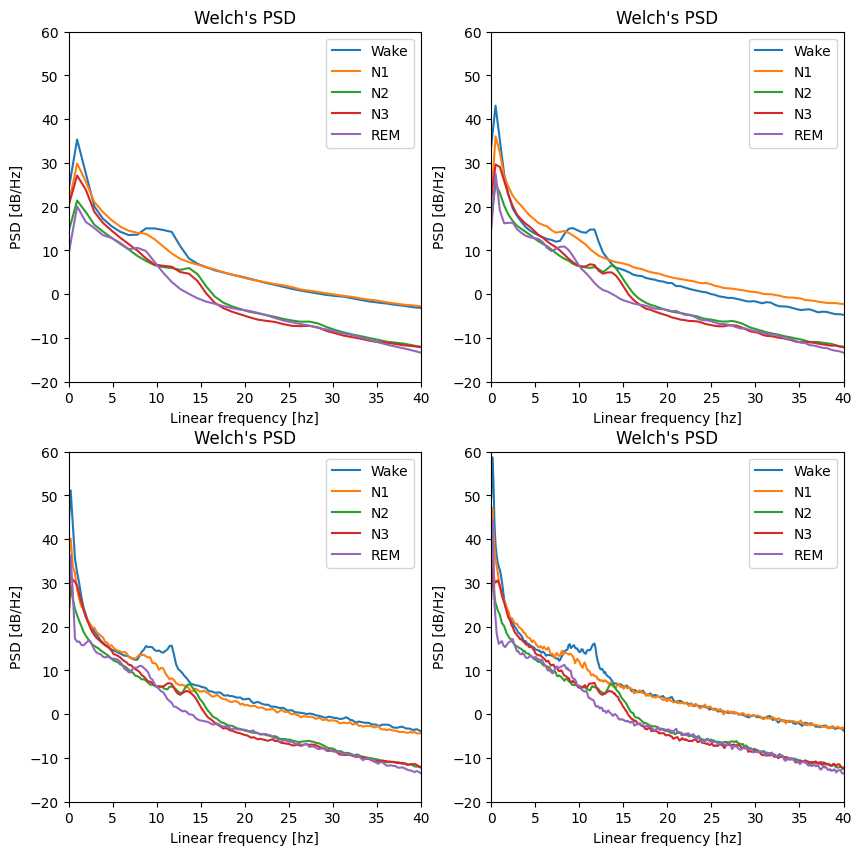

In [7]:
import matplotlib.pyplot as plt
plt.close('all')
n=2
fig, ax = plt.subplots(n,n, figsize=(10, 10))
for i in range(n):
    for j in range(n):
        pipe.plot_psd_per_stage('E101', save=False, psd_range=[-20, 60], nperseg=1024*(2**(2*i+j)), axis=ax[i,j])
plt.show()